In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


# Creating data to view and fit

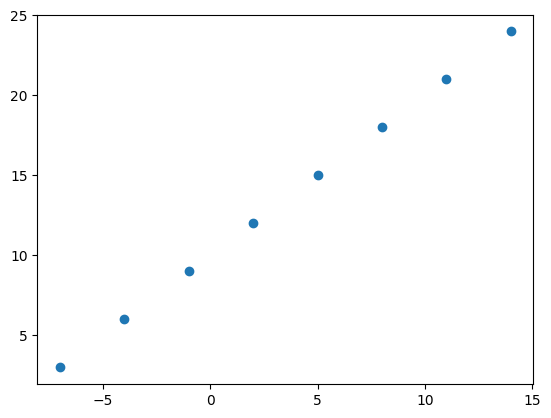

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create freatures
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visulalize
plt.scatter(x,y)

In [3]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Demo
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = x.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [6]:
x[0],y[0]

(-7.0, 3.0)

In [7]:
# Trun our numpy array to tensors
x = tf.constant(x)
y = tf.constant(y)
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

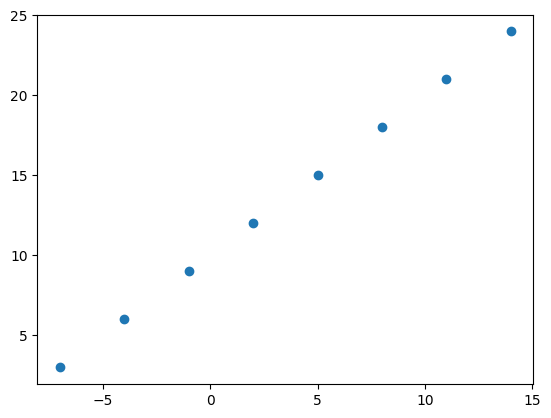

In [9]:
plt.scatter(x,y)

## Steps in modelling with tensorFlow

1. **Creating a model** - define the input and output layers, as well
as the hidden layers

2. **Compiling a modle** - define the loss function (the funciton which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics

3. **Fitting a model** - letting the model try to find the patterns between x & y (features and labels)

In [10]:
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(x,axis=-1),y,epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 837ms/step - loss: 16.8055 - mae: 16.8055
Epoch 2/5
1/1 [==============================] - 0s 29ms/step - loss: 16.5242 - mae: 16.5242
Epoch 3/5
1/1 [==============================] - 0s 28ms/step - loss: 16.2430 - mae: 16.2430
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 15.9617 - mae: 15.9617
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 15.6805 - mae: 15.6805


In [11]:
# other way
# model = tf.keras.Sequential()

# model.add(tf.keras.Dense(1))

# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizer.SGD,
#               metrics=["mae"])

# model.fit(X, y, epochs=5)

In [12]:
# Check out x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
# Try and make a prediction
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 308ms/step


array([[-8.63194]], dtype=float32)

In [14]:
y_pred + 11

array([[2.36806]], dtype=float32)

## Improving our model

1. **Creating a model** - Add more layers, increase number of neurons, change the activation function

2. **Compiling a model** - Change optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - Increase number of epochs or more data

In [15]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 493ms/step - loss: 9.8250 - mae: 9.8250
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 9.6925 - mae: 9.6925
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 9.5600 - mae: 9.5600
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4275 - mae: 9.4275
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 9.2950 - mae: 9.2950
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 9.1625 - mae: 9.1625
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0300 - mae: 9.0300
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.8975 - mae: 8.8975
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7650 - mae: 8.7650
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 8.6325 - mae: 8.6325
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - lo

In [16]:
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 64ms/step


array([[29.952375]], dtype=float32)

In [18]:
# Let's build again

#  1. Create the model (Extra hidden layers)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 604ms/step - loss: 12.6280 - mae: 12.6280
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 11.9727 - mae: 11.9727
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 11.3123 - mae: 11.3123
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 10.6444 - mae: 10.6444
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 9.9662 - mae: 9.9662
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 9.2746 - mae: 9.2746
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.5670 - mae: 8.5670
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.8410 - mae: 7.8410
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.0939 - mae: 7.0939
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8255 - mae: 6.8255
Epoch 11/100
1/1 [==============================] - 0s 12ms/

In [19]:
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 130ms/step


array([[26.364952]], dtype=float32)

## Evaluting a Model

**Visualize**
1. The data
2. The model itselt
3. The traning of a model
4. The predictions of the model

In [21]:
# Make a bigger dataset
x = tf.range(-100,100,4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

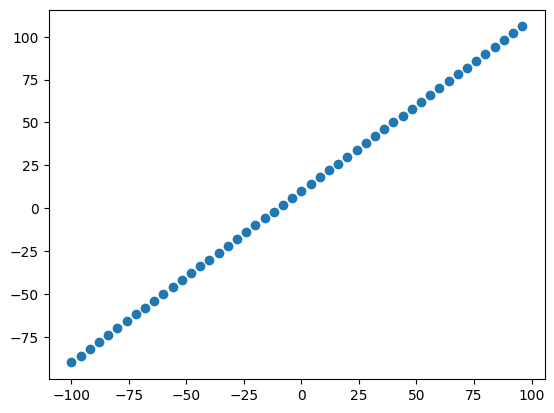

In [23]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(x,y)

### 3 sets....

* **Traning set** - model learn form this data
* **Validation set** - the model gets tuned on this data.
* **Test set** - the model gets evaluated on this data to test
what is has learned.

In [24]:
len(x)

50

In [25]:
# Split the data into train and test sets
x_train = x[:40] # 80%
x_test = x[40:] # 20%
y_train = y[:40]
y_test = y[40:]

len(x_train), len(x_test)

(40, 10)

### Visualizing the data

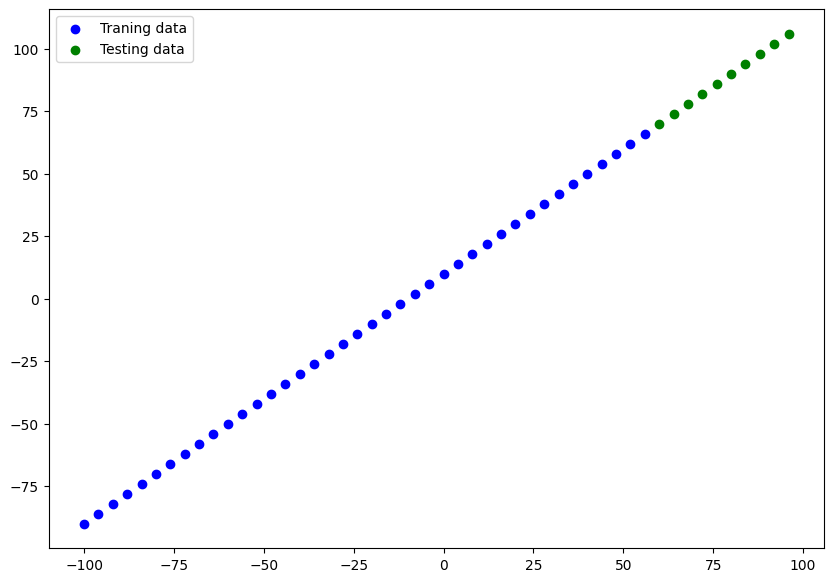

In [26]:
plt.figure(figsize=(10,7))
# plot tranning data
plt.scatter(x_train,y_train,c='b',label='Traning data')
# Plot test data
plt.scatter(x_test,y_test,c='g',label='Testing data')
# Show a legend
plt.legend()
plt.show()

In [27]:
# Let's build a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# model.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

## Visualizing the model

In [28]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [29]:
# Let's create a model which build automatically
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Summary

* **Total params:** The total number of parameters in the model.
* **Trainable params:** The number of parameters that are updated during training.
* **Non-trainable params:** Parameters that are not updated during training

In [30]:
# Fit model
model.fit(x_train,y_train,epochs=100,verbose=0)

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


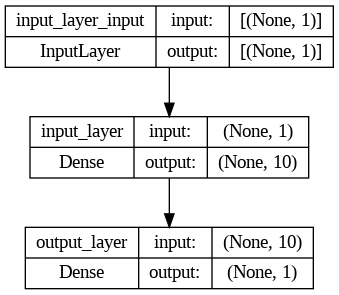

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

## Visualizing model's predictions

In [33]:
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 161ms/step


array([[ 75.76291 ],
       [ 80.700066],
       [ 85.637215],
       [ 90.57436 ],
       [ 95.511505],
       [100.44866 ],
       [105.38581 ],
       [110.32295 ],
       [115.2601  ],
       [120.19725 ]], dtype=float32)

In [34]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [35]:
# Create a plotting function
import matplotlib.pyplot as plt

def plot_prediction(train_data=x_train,
                    train_labels=y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    predictions=y_pred):

     plt.figure(figsize=(10,7))
     # Plot traning data in blue
     plt.scatter(train_data,train_labels,c="b",label="Traning Data")
     # Plot testing data in green
     plt.scatter(test_data,test_labels,c="g",label="Testing Data")
     # Plot model's prediction in red
     plt.scatter(test_data,predictions,c="r",label="Predictions")
     # Show the legend
     plt.legend()
     plt.show()


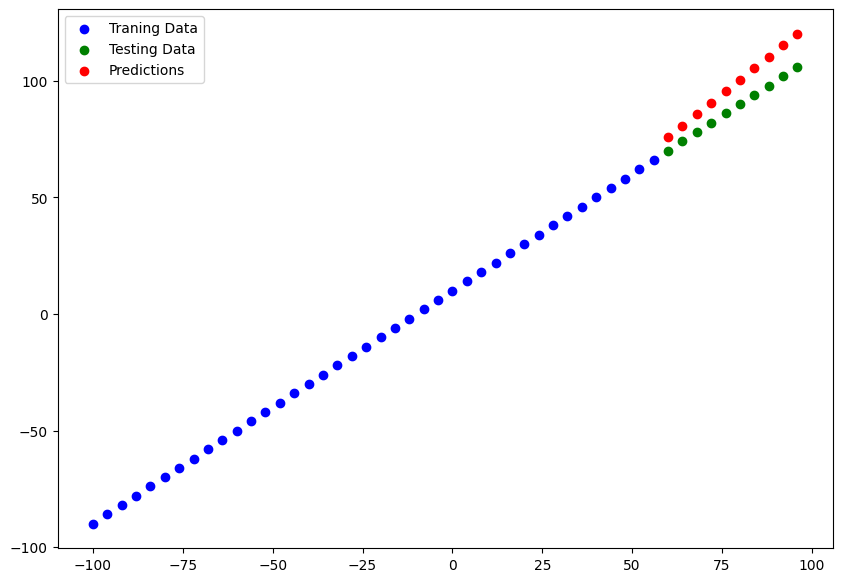

In [36]:
plot_prediction(x_train,y_train,x_test,y_test,y_pred)

## Evaluting our model's predictions with regression evaluation metrics

* MAE - mean absolute error
* MSE - mean square error

In [38]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 309ms/step - loss: 9.9801 - mae: 9.9801


[9.980081558227539, 9.980081558227539]

In [39]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.742254, 11.319974, 10.072557, 10.114873, 11.404602, 13.869197,
       17.508648, 22.322952, 27.260101, 32.19725 ], dtype=float32)>

In [40]:
y_test


<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [47]:
y_pred = tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 75.76291 ,  80.700066,  85.637215,  90.57436 ,  95.511505,
       100.44866 , 105.38581 , 110.32295 , 115.2601  , 120.19725 ],
      dtype=float32)>

In [48]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 75.76291 ,  80.700066,  85.637215,  90.57436 ,  95.511505,
       100.44866 , 105.38581 , 110.32295 , 115.2601  , 120.19725 ],
      dtype=float32)>

In [49]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=9.980083>

In [50]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=106.84761>

### Running experiments to improve our model

In [51]:
x_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

#### Build model_1

In [54]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(x_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 14.2485 - mae: 14.2485
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 10.3878 - mae: 10.3878
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 10.7825 - mae: 10.7825
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4943 - mae: 9.4943
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3929 - mae: 10.3929
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.6283 - mae: 9.6283
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.7357 - mae: 8.7357
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0569 - mae: 9.0569
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 19.1680 - mae: 19.1680
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3449 - mae: 10.3449
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - 

1/1 [==============================] - 0s 86ms/step


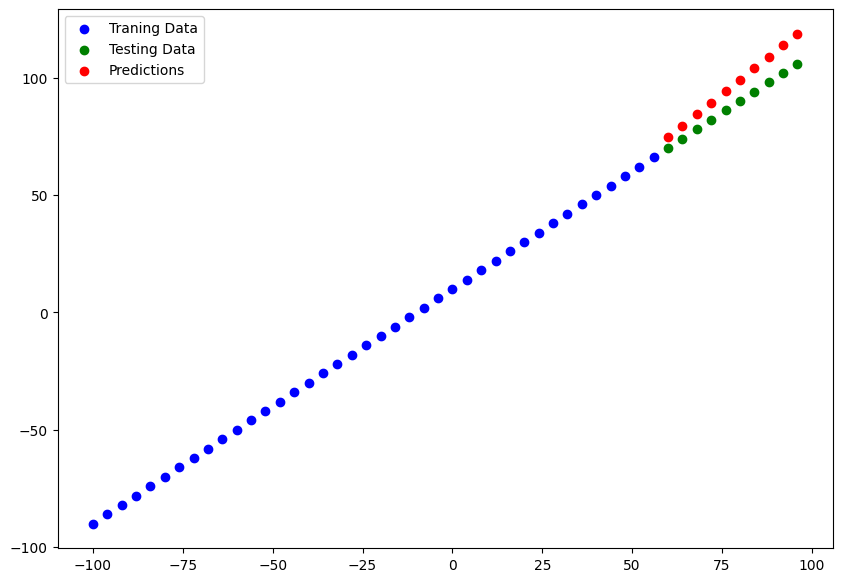

In [55]:
y_preds_1 = model_1.predict(x_test)
plot_prediction(predictions=y_preds_1)

In [58]:
tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds_1)), tf.metrics.mean_squared_error(y_test,tf.squeeze(y_preds_1))

(<tf.Tensor: shape=(), dtype=float32, numpy=8.656392>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.46476>)

In [59]:
def mae(y_test,y_preds):
    return tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds))

def mse(y_test,y_preds):
    return tf.metrics.mean_squared_error(y_test,tf.squeeze(y_preds))

In [78]:
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.656392>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.46476>)

#### Build model_2

In [71]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_dim=1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_2.fit(x_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 30.5720 - mae: 30.5720
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 10.9009 - mae: 10.9009
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 26.8475 - mae: 26.8475
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 13.6423 - mae: 13.6423
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 18.3757 - mae: 18.3757
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2877 - mae: 9.2877
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2469 - mae: 10.2469
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1984 - mae: 11.1984
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 41.7117 - mae: 41.7117
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 28.9446 - mae: 28.9446
Epoch 11/100
2/2 [==============================] - 0s 8ms/s

1/1 [==============================] - 0s 51ms/step


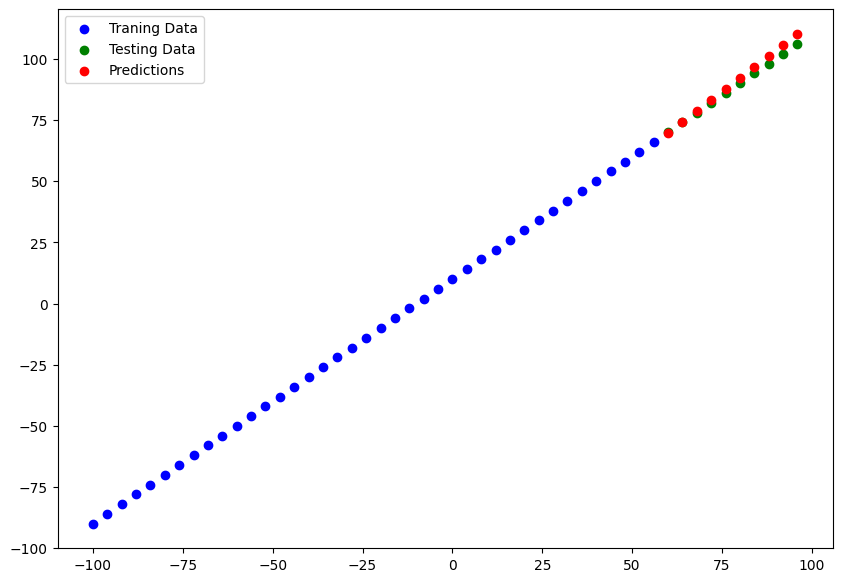

In [72]:
y_preds_2 = model_2.predict(x_test)
plot_prediction(predictions=y_preds_2)

In [79]:
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.978482>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.796738>)

#### Build model_3

In [75]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_dim=1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_2.fit(x_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 21ms/step - loss: 23.1703 - mae: 23.1703
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 22.5151 - mae: 22.5151
Epoch 3/500
2/2 [==============================] - 0s 22ms/step - loss: 28.2211 - mae: 28.2211
Epoch 4/500
2/2 [==============================] - 0s 20ms/step - loss: 12.6006 - mae: 12.6006
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 15.5444 - mae: 15.5444
Epoch 6/500
2/2 [==============================] - 0s 22ms/step - loss: 12.3311 - mae: 12.3311
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 11.6157 - mae: 11.6157
Epoch 8/500
2/2 [==============================] - 0s 12ms/step - loss: 12.0295 - mae: 12.0295
Epoch 9/500
2/2 [==============================] - 0s 17ms/step - loss: 37.6022 - mae: 37.6022
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 25.2541 - mae: 25.2541
Epoch 11/500
2/2 [==============================]

1/1 [==============================] - 0s 90ms/step


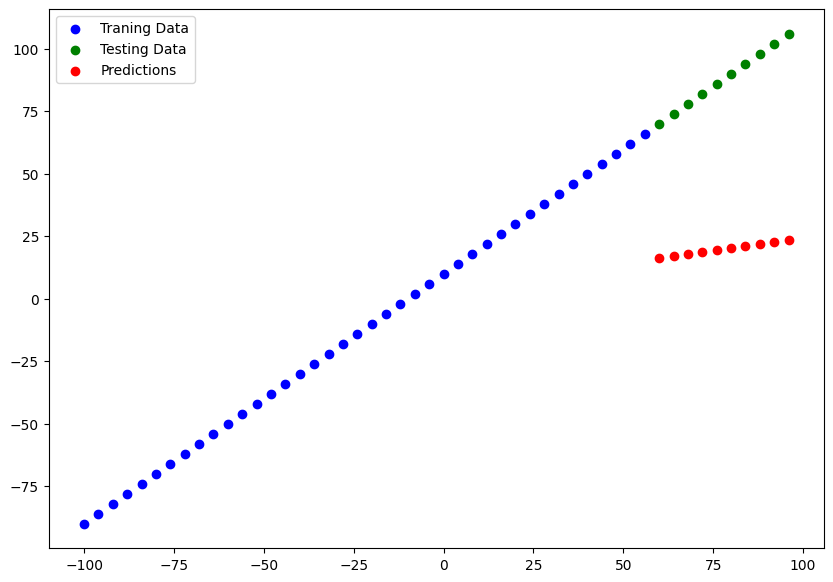

In [76]:
y_pred_3 = model_2.predict(x_test)
plot_prediction(predictions=y_pred_3)

In [80]:
mae_3 = mae(y_test,y_pred_3)
mse_3 = mse(y_test,y_pred_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.07346>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4718.9556>)

## Comparing the result of our experiments


In [81]:
import pandas as pd

model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results


,model,mae,mse
0,model_1,8.656392,81.464760
1,model_2,1.978482,5.796738
2,model_3,68.073463,4718.955566


In [82]:
model_2.summary() # best model

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tracking our experiment

* 1. TensorBoard
* 2. Weights & Biases

## Saving our models

There are two main formats

* 1. The SavedModel format
* 2. The HDF5 format

In [83]:
# SavedModel
model_2.save("best_model_SavedModel_format")

In [84]:
# HDF5
model_2.save("best_model_2_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a Saved model

In [86]:
# Load SaveModel format
loaded_SaveModel = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SaveModel.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
# Compare model_2 with savedmodle
model_2_preds = model_2.predict(x_test)
savedmodel_preds = loaded_SaveModel.predict(x_test)
model_2_preds == savedmodel_preds

1/1 [==============================] - 0s 205ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [89]:
# Loading HDF5 format
loaded_hdf5 = tf.keras.models.load_model("/content/best_model_2_HDF5_format.h5")

loaded_hdf5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
h5_preds = loaded_hdf5.predict(x_test)
h5_preds == model_2_preds

1/1 [==============================] - 0s 85ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Downlaod a model

* 1. Just right click and downlaod
* 2. use code
* 3. save it to google drive

In [91]:
from google.colab import files
files.download("/content/best_model_2_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp file_location destination_location # cp -> copy, !ls -> list